In [1]:
####################################################################
#PROJECT NAME: Term Deposit Sale(Ensemble Project)                 #    
#                                                                  #
#                                                                  #                    
#PROGRAM NAME: Ensemble Project(Term_Deposit_Sale)                 #                                                               #
#AUTHOR:     Kevin Kluck                                           #
#DATE:       7/24/2020                                             #
#                                                                  #
#Python Version:3.7.6                                              #      
#                                                                  #
#                                                                  #         
#ABSTRACT:Build a model that will help the marketing team identify #         
#         potential customers who are relatively more likely to    #
#         to subscribe term deposit.                               #
####################################################################


In [2]:
##############################
##                          ##
##      Import Libraries    ##
##                          ##
##############################

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer  
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

Data is from https://archive.ics.uci.edu/ml/datasets/Bank+Marketing. I would like to thank S. Moro, P. Cortez, and P. Rita
for putting together this data set.

In [3]:
##############################
##                          ##
##      Import Data         ##
##                          ##
##############################



df = pd.read_csv("Bank-full.csv") 



############# python formating ##################
extra = {'Bold': '\x1b[1m',
        'Underline': '\x1b[4m',
        'Blue': '\x1b[94m',
        'End': '\x1b[0m'}

seed = 1729

Deliverable -1 (Exploratory data quality report)

In [4]:
##################################
##                              ##
##      Explore Bank Data       ##
##                              ##
##################################

print(extra['Bold'],extra['Blue'],extra['Underline'],"\nData Types")
print("\n")
print(extra['End'],df.dtypes)

print(extra['Bold'],extra['Blue'],extra['Underline'],"\nShape")
print("\n")
print(extra['End'],df.shape)

print(extra['Bold'],extra['Blue'],extra['Underline'],"\nNumber of Missing Values per Column")
print("\n")
print(extra['End'],df.isnull().sum())

print(extra['Bold'],extra['Blue'],extra['Underline'],"\nNumber of Unique Values per Column")
print("\n")
print(extra['End'],df.nunique())

print(extra['Bold'],extra['Blue'],extra['Underline'],"\nRanges of Numerical Data")
print(extra['End'])
column1 = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
print(df[column1].max()-df[column1].min())

print(extra['Bold'],extra['Blue'],extra['Underline'],"\nStatistical Summary")
print(extra['End'])
df.describe()


   
Data Types


 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object
   
Shape


 (45211, 17)
   
Number of Missing Values per Column


 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64
   
Number of Unique Values per Column


 age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         55

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Text(0.5, 1.0, 'Distribution of Age')

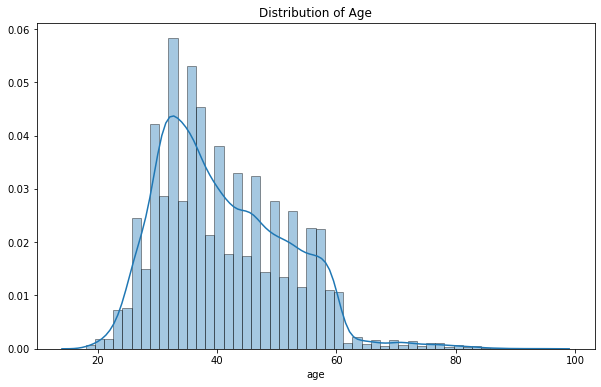

In [5]:
plt.figure(figsize=(10,6))
sns.distplot(df['age'], hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribution of Age')

In [6]:
Upper_age = df['age'].mean()+3*df['age'].std()
number1 = len(df[(df['age']>Upper_age)])
print('Number of clients that have an age above', round(Upper_age,0), ':', number1,"(",round(number1/len(df)*100,1),"%",")")

Number of clients that have an age above 73.0 : 381 ( 0.8 % )


Age represents the client’s age. From the plot above, the distribution seems to be a little skewed to the right. There are some outliers, clients older than 73, which makes up less than 1 % of all clients. Removal of these outliers may not be necessary. Through transformation of ages I could correct the distribution and the outliers may not stick out as much. 

Text(0.5, 1.0, 'Distribution of Balance')

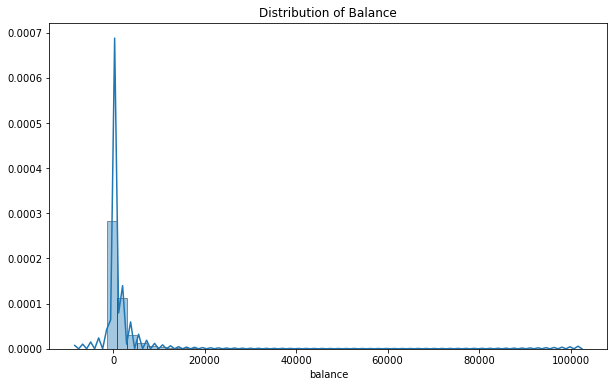

In [7]:
plt.figure(figsize=(10,6))
sns.distplot(df['balance'], hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribution of Balance')

In [8]:
Upper_bal = df['balance'].quantile(0.75)+1.5*(df['balance'].quantile(0.75)-df['balance'].quantile(0.25))
number2 = len(df[(df['balance']>Upper_bal)])
print('Number of clients that have an balance above', round(Upper_bal,0), ':', number2)

Upper_bal1 = df['balance'].mean()+3*df['balance'].std()
number3 = len(df[(df['balance']>Upper_bal1)])
print('Number of clients that have an balance above 3 sd from the mean,', round(Upper_bal1,0), ':', number3)


number4 = len(df[(df['balance']< 0)])
print('Number of clients that have negative balance,',':', number4)

Number of clients that have an balance above 3462.0 : 4712
Number of clients that have an balance above 3 sd from the mean, 10497.0 : 744
Number of clients that have negative balance, : 3766


Balance represents the client’s balance in their bank account. Data seems to be heavily skewed to the right. 3766 clients have negative balances and there are 744 clients that have balances that are more than 3 standard deviations from the mean. Outliers will have to be removed and transformation will have to be applied to correct skewness.

Text(0.5, 1.0, 'Distribution of Day')

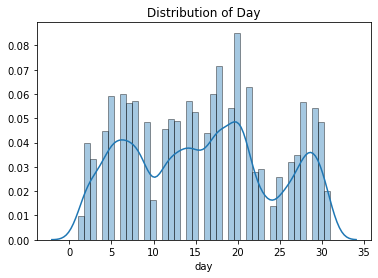

In [9]:
sns.distplot(df['day'], hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribution of Day')

Day is the last contact day of the month. This is more of a categorical than numeric. This variable should be dropped because there would be too many categories. 

Text(0.5, 1.0, 'Distribution of Duration')

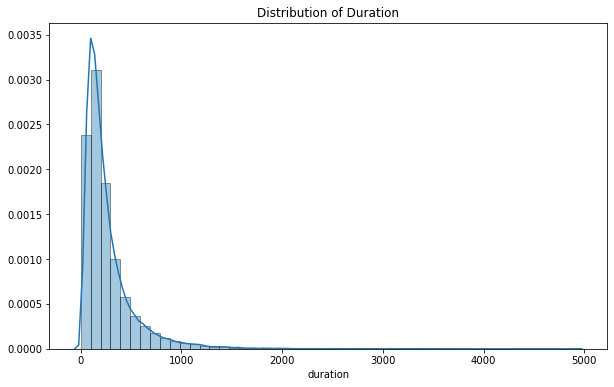

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(df['duration'], hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribution of Duration')

In [11]:
Upper_dur = df['duration'].mean()+3*df['duration'].std()
number4 = len(df[(df['duration']>Upper_dur)])
print('Number of clients that have duration above 3 sd from the mean,', round(Upper_dur,0), ':', number4)
number5 = len(df[(df['duration'] == 0)])
print('Number of clients that have duration of 0,', ':', number5)

Number of clients that have duration above 3 sd from the mean, 1031.0 : 963
Number of clients that have duration of 0, : 3


Duration represent the contact time with the client in seconds. Duration data is heavily skewed to the right and needs data transformation. Also, there are 963 observations that have durations larger than 3sd, which these outliers should be removed.

Text(0.5, 1.0, 'Distribution of Campaign')

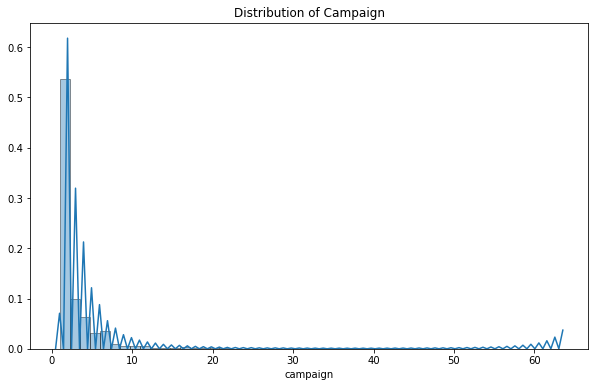

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(df['campaign'], hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribution of Campaign')

In [13]:
Upper_cam = df['campaign'].mean()+3*df['campaign'].std()
number5 = len(df[(df['campaign']>Upper_cam )])
print('Number of contacts above 3 sd from the mean,', round(Upper_cam,0), ':', number5)
number6 = len(df[(df['campaign']==1)])
print('Number of clients that had only one contact,', ':', number6)
print(number6/len(df)*100)

number7 = len(df[(df['campaign']> 9)])
print('Number of clients were contacted more than 10 times,', ':', number7)

Number of contacts above 3 sd from the mean, 12.0 : 840
Number of clients that had only one contact, : 17544
38.80471566654133
Number of clients were contacted more than 10 times, : 1462


Campaign represents the number of contacts to the client during this campagin. There are 840 outliers, these are 
clients that were contacted more than 12 times. The distribution is heavily skewed right. About 38.8 percent of clients were contact only once. It may be better to change contacts into three groups, 1 to 4 times, 5 to 9, and 10 plus.

Text(0.5, 1.0, 'Distribution of pdays')

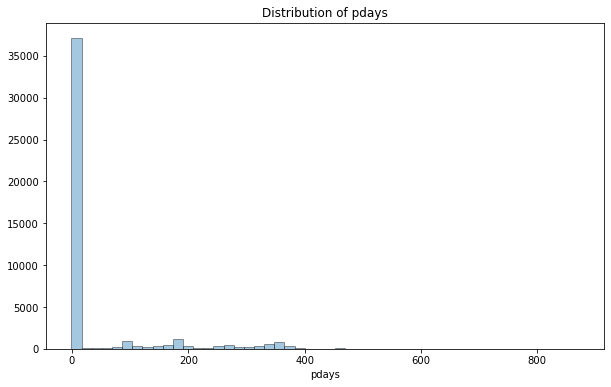

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(df['pdays'], kde=False, hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribution of pdays')

In [15]:
number7 = len(df[(df['pdays']==-1)])
print('Number of -1 values for pdays,', ':', number7,"(",round(number7/len(df)*100,1),"%",")")


Number of -1 values for pdays, : 36954 ( 81.7 % )


Pdays represents the number of days that passed by after the client was last contacted from a previous campaign. This data set is heavily skewed right. We know from the problem statement document, that -1  represents a client either was not contacted or contacted period is beyond 900 days. Since over 81 percent of this column is made up of -1 values and we don't know if the client was never contacted or it's been a long time, we should drop this attribute.

Text(0.5, 1.0, 'Distribution of previous')

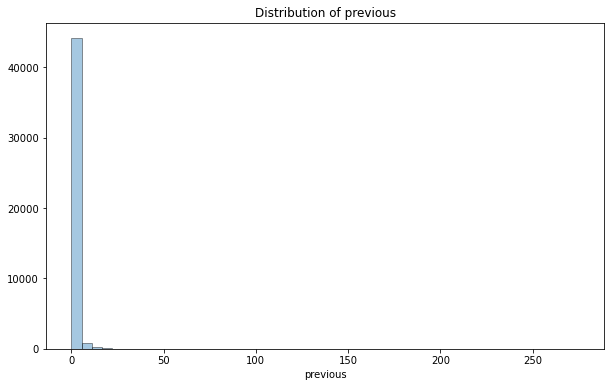

In [16]:
plt.figure(figsize=(10,6))
sns.distplot(df['previous'], kde=False, hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribution of previous')

In [17]:
number7 = len(df[(df['previous']==0)])
print('Number of clients that had 0 contact,', ':', number7)
number8 = len(df[(df['previous']> 75)])
print('Number of clients that had 100 contact,', ':', number8)

Number of clients that had 0 contact, : 36954
Number of clients that had 100 contact, : 1


Previous is the number of contacts performed before this campaign. This data set is heavily skewed right. There is one observation that has 275 contacts, which should be removed.  Since most observations have 0 contacts, we should make a categorial variable saying either a client has or hasn't been contacted.

 Marital Status                                     % Percentage  

married                                              60.2
single                                               28.3
divorced                                             11.5


 Education                                          % Percentage  

secondary                                            51.3
tertiary                                             29.4
primary                                              15.2
unknown                                              4.1


 Has Credit in Default                              % Percentage  

no                                                   98.2
yes                                                  1.8


 Has Housing Loan                                   % Percentage  

yes                                                  55.6
no                                                   44.4


 Has Personal Loan                                  % Percentage  

no              

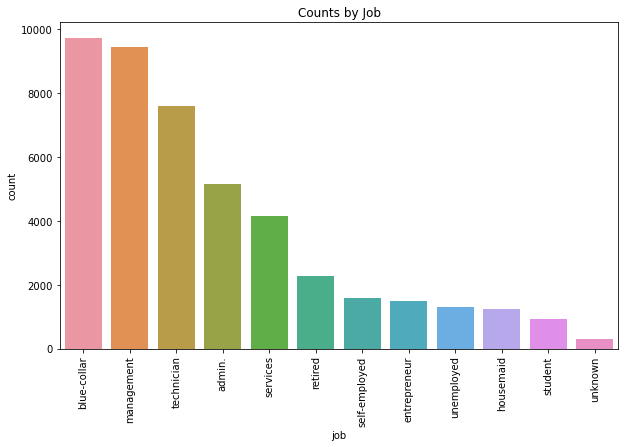

In [18]:

def charts(a,b):
    var =round(df[a].value_counts(normalize=True).sort_values(ascending = False)*100,1)
    print(extra['Underline'],b.ljust(50,' '), "% Percentage",extra['End'],"\n")
    for a, count in var.iteritems():
        print(a.ljust(52, " "), count)
    print("\n")
    return

charts('marital', 'Marital Status')
charts('education', 'Education')
charts('default','Has Credit in Default')
charts('housing', 'Has Housing Loan')
charts('loan', 'Has Personal Loan')
charts('contact', 'Contact Communication Type ')
charts('poutcome', 'Outcome of the Previous Marketing Campaign')
charts('month', 'Last Contact Month of Year')
charts('Target', 'Subscribed a Term Deposit')

plt.figure(figsize=(10,6))
sns.countplot(x = df['job'], order = df['job'].value_counts().index)
plt.title('Counts by Job')
plt.xticks(rotation=90)
number9 = len(df[(df['job']== "unknown")])



In [19]:
print('Number of unknowns,', ':', number9)

Number of unknowns, : 288


Marital is the marital status of the client. 
Education is the education level of the client. Some client’s have education level of unknown. Since there is little over 4% unknown values, we shouldn’t remove these values because it would cost too much information in being lost.

Default represents if a client has credit in default. There is a small group, 1.8 %, that have defaulted on their loans so this variable should be dropped.

Housing represents if a client has a housing loan or not.

Loan represents if a client has a personal loan or not.

Contact is the type of communication the client was contacted. There is 28.8 % that the type is unknown but removing such a large group would be losing a lot of information. So, this attributed may need to be dropped.
Poutcome is the outcome of the previous marketing campaign. I would think unknown would be considered a failed, but I don’t know for sure. Since missing data is so large, this attribute should be dropped.
Month is the last month contact of the year. There is too many categories so months should be change to quarters. Finding out what time of the year contacts happen, may be useful.

Target, is the output, did the client subscribe a term deposit. The success is 11.7 percent, which isn't a rare event, but has a high class imbalance.

Job, is the type of job the client has. There are 288 clients that are marked unknown. We can remove these observations because not knowing what someone's job is wouldn't be valuable to finding out who is subscribing for a term deposit.


2. Multivariate analysis

Text(0.5, 1, 'CORRELATION BETWEEN VARIABLES')

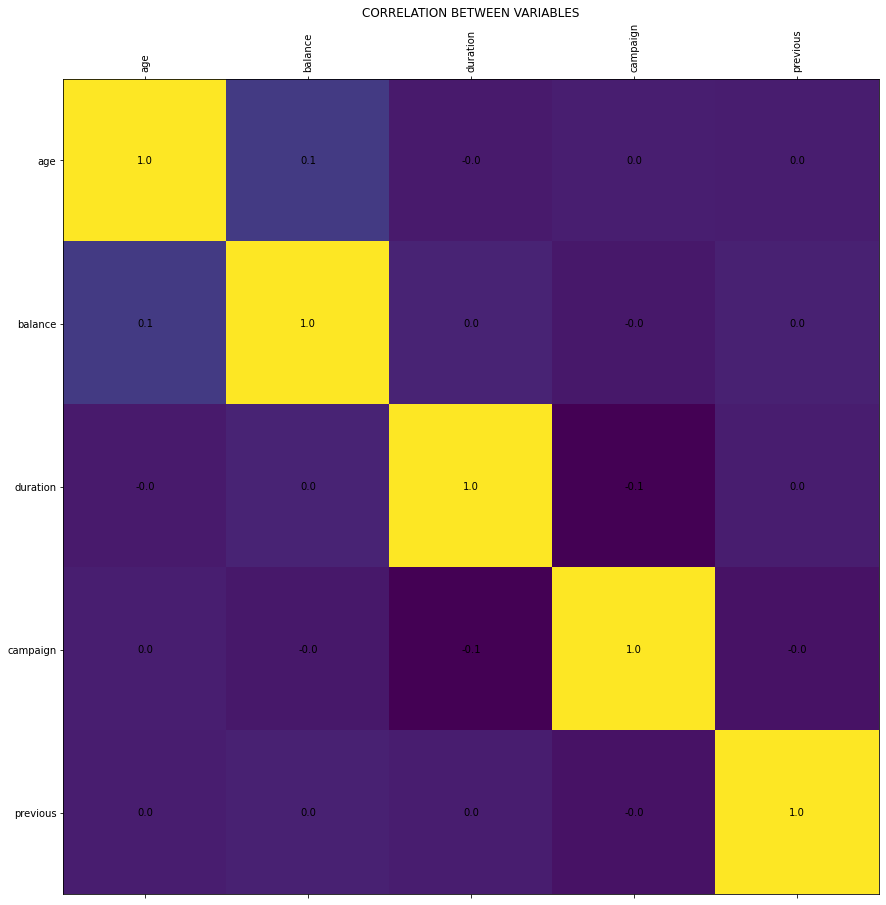

In [20]:
############ drop variables ##################

df1 = df.drop(columns=[ 'day', 'pdays', 'default'])
def plot_corr(df1, size=15):
    corr = df1.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plot_corr(df1)
plt.xticks(rotation = 90)
plt.title('CORRELATION BETWEEN VARIABLES', y = 1) 

There seems to be little to no correlation between numeric variables.

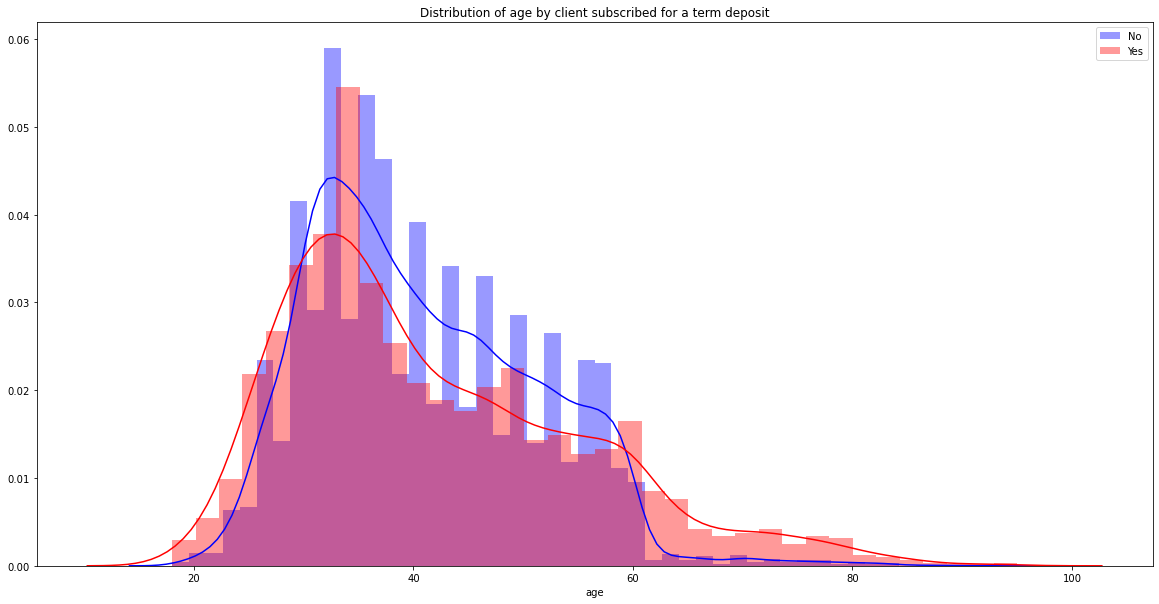

In [21]:
plt.figure(figsize=(20,10))
plt.title('Distribution of age by client subscribed for a term deposit')
sns.distplot(df1[df1['Target']=="no"]['age'],color='b',label= "No")
sns.distplot(df1[df1['Target']=="yes"]['age'],color='r',label="Yes")
plt.legend()
plt.show()

The distribution of age for subscribing and not subscribing are very similar. There may be no correlation here. This attribute should be dropped from the model.

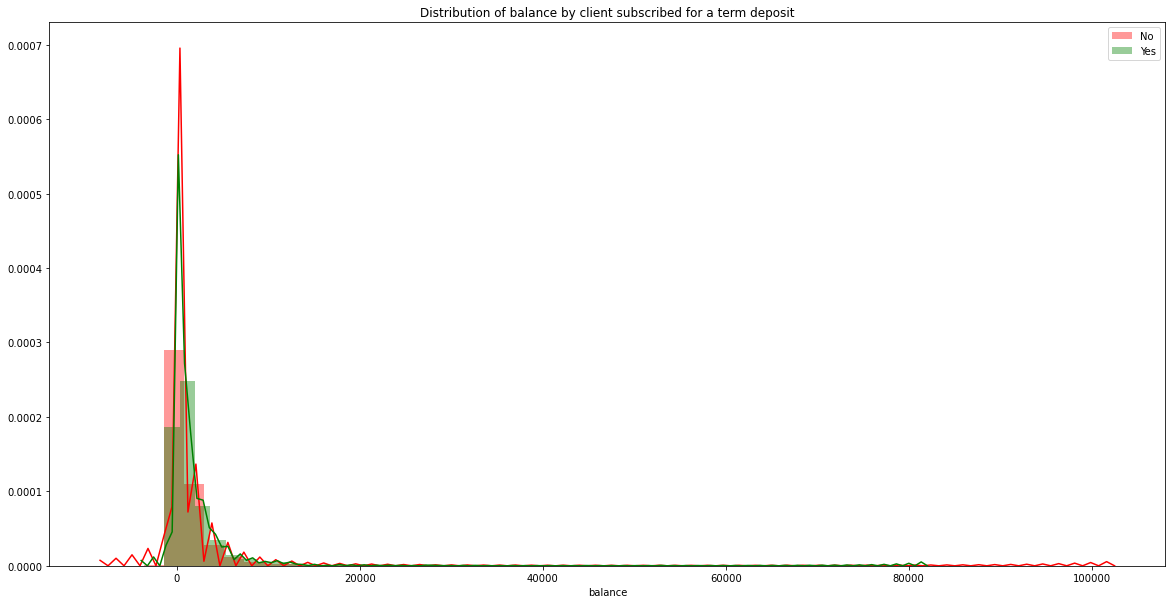

In [22]:
plt.figure(figsize=(20,10))
plt.title('Distribution of balance by client subscribed for a term deposit')
sns.distplot(df1[df1['Target']=="no"]['balance'],color='r',label= "No")
sns.distplot(df1[df1['Target']=="yes"]['balance'],color='g',label="Yes")
plt.legend()
plt.show()

The distribution of balance for subscribing and not subscribing are very similar. There may be no correlation here. This attribute should be dropped from the model.

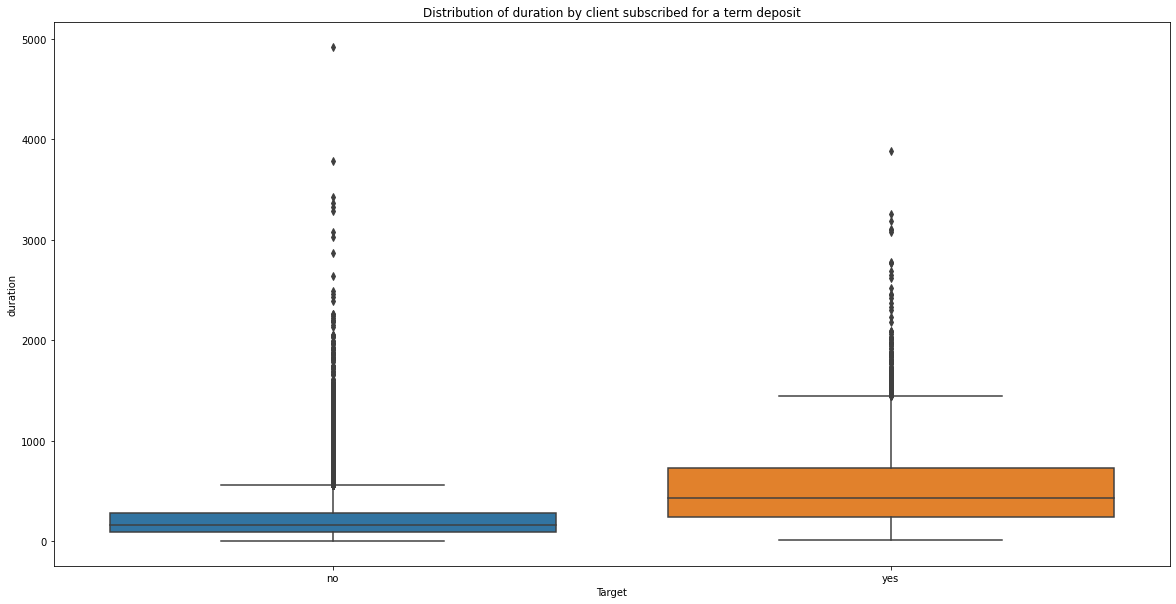

In [23]:
plt.figure(figsize=(20,10))
plt.title('Distribution of duration by client subscribed for a term deposit')
sns.boxplot(df1['Target'], df1['duration']);

There seems to be a difference between subscribers and non-subscribers. Clients that subscribe seem to have longer durations.

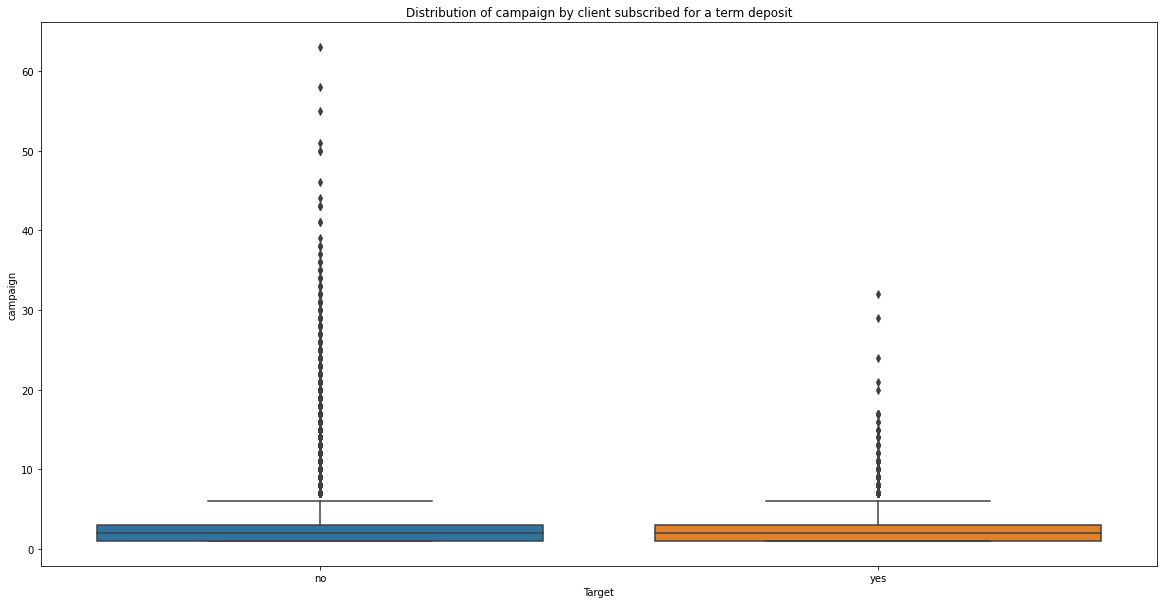

In [24]:
plt.figure(figsize=(20,10))
plt.title('Distribution of campaign by client subscribed for a term deposit')
sns.boxplot(df1['Target'], df1['campaign']);

There seems to be me no variation between target and campaign. This attribute should be removed. 

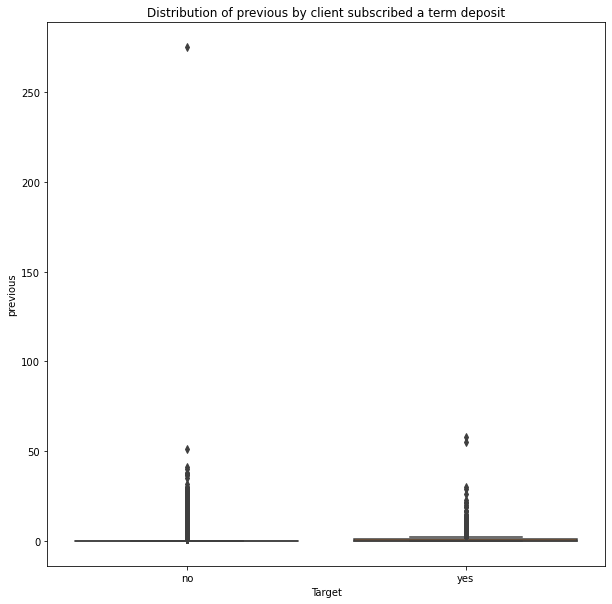

In [25]:
plt.figure(figsize=(10,10))
plt.title('Distribution of previous by client subscribed a term deposit')
sns.boxplot(df1['Target'], df1['previous']);

There seems to be very little difference between subscribers and non-subscribers. This attribute should be dropped from the model.

In [26]:
pd.crosstab(df['Target'], df['job'],normalize='all')

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
Target,,,,,,,,,,,,
no,0.100418,0.199597,0.030170,0.025016,0.180421,0.038663,0.030789,0.083719,0.014797,0.149455,0.024352,0.005618
yes,0.013957,0.015660,0.002721,0.002411,0.028776,0.011413,0.004136,0.008162,0.005950,0.018580,0.004468,0.000752


Unknown is the smallest group and should be removed. Entrepreneur and self-employed are the same, and should be put together. Admin and management are the same so I'll put them together.

In [27]:
pd.crosstab(df['Target'], df['marital'],normalize='all')

marital,divorced,married,single
Target,,,
no,0.101413,0.540997,0.240605
yes,0.013758,0.060936,0.042291


It seems most of all the clients who got substritions were married. This is also the largest group who was contacted.

In [28]:
pd.crosstab(df['Target'], df['education'],normalize='all')

education,primary,secondary,tertiary,unknown
Target,,,,
no,0.138462,0.459003,0.250050,0.035500
yes,0.013072,0.054190,0.044149,0.005574


Since unknown is a small group, it should be dropped from data set.

In [29]:
pd.crosstab(df['Target'], df['housing'],normalize='all')

housing,no,yes
Target,,
no,0.369976,0.513039
yes,0.074185,0.042799


Out of all the substribers most of them didn't have home loan.

In [30]:
pd.crosstab(df['Target'], df['loan'],normalize='all')

loan,no,yes
Target,,
no,0.733494,0.149521
yes,0.106279,0.010705


Out of all the substribers most of them didn't have personal loan.

In [31]:
pd.crosstab(df['Target'], df['contact'],normalize='all')

contact,cellular,telephone,unknown
Target,,,
no,0.551105,0.055650,0.276260
yes,0.096636,0.008626,0.011723


Most clients were contacted by cell phone. Since there is such a large group of missing, this attributed should be dropped.

In [32]:
pd.crosstab(df['Target'], df['poutcome'],normalize='all')

poutcome,failure,other,success,unknown
Target,,,,
no,0.094734,0.033908,0.011789,0.742585
yes,0.013669,0.006790,0.021632,0.074893


Since there is such a large group of missing, this attributed should be dropped.

In [33]:
pd.crosstab(df['Target'], df['month'],normalize='all')

month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
Target,,,,,,,,,,,,
no,0.052089,0.122957,0.002522,0.048838,0.027891,0.138639,0.106058,0.005065,0.284024,0.078897,0.009179,0.006857
yes,0.012762,0.015218,0.002212,0.009754,0.003141,0.013868,0.012077,0.005485,0.020460,0.008914,0.007144,0.005950


In [34]:
df1['Qrt'] = df1['month'].replace({'jan': '1', 'feb': '1', 'mar': '1',
                                          'apr': '2', 'may': '2', 'jun': '2',
                                          'jul': '3', 'aug': '3', 'sep': '3',
                                          'oct': '4', 'nov': '4', 'dec': '4'})
pd.crosstab(df1['Target'], df1['Qrt'],normalize='all')

Qrt,1,2,3,4
Target,,,,
no,0.081794,0.442171,0.268452,0.090597
yes,0.018380,0.045299,0.035036,0.018270


Most people got contacted mainly in the middle of the year. Qrt and target varaible don't seem balance between the different classes. I will remove this attribute.  

Deliverable – 2 (Prepare the data for analytics) 

In [35]:
################### drop variables and make dummies variables ######################
df1 = df.drop(columns=['day', 'pdays', 'default', 'campaign', 'previous', 'month', 'poutcome', 'contact','age','balance'])
cleanup_names = {"Target": {"no":0, "yes":1},
                "loan": {"no":0, "yes":1},
                "housing": {"no":0, "yes":1}}
df1.replace(cleanup_names, inplace=True)
df1=df1.replace(to_replace ="self-employed", 
                 value ="entrepreneur") 
df1=df1.replace(to_replace ="admin.", 
                 value ="management") 
df1 =df1[(df1['job']!= "unknown")]
df1 =df1[(df1['education']!= "unknown")]
df1 = pd.get_dummies(df1, columns=['education', 'job','marital'])
df1=df1.drop(columns = ['education_primary', 'job_unemployed'])#primary will be the default 

print(extra['Bold'],extra['Blue'],extra['Underline'],"\nChecking Data Types")
print("\n")
print(extra['End'],df1.dtypes)

   
Checking Data Types


 housing                int64
loan                   int64
duration               int64
Target                 int64
education_secondary    uint8
education_tertiary     uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_services           uint8
job_student            uint8
job_technician         uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
dtype: object


In [36]:
################### drop outliers ######################

Upper_dur = df1['duration'].mean()+3*df1['duration'].std()
df1 = df1[(df1['duration']<Upper_dur)]

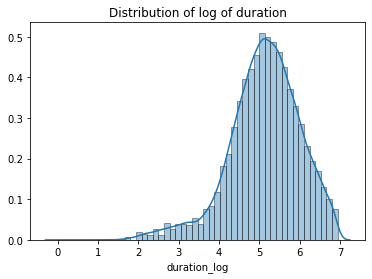

In [37]:
log_transformer = FunctionTransformer(np.log1p)
plt.title('Distribution of log of duration')
df1['duration_log'] = log_transformer.fit_transform(df1[['duration']])
sns.distplot(df1['duration_log'], hist_kws=dict(edgecolor="k", linewidth=1))

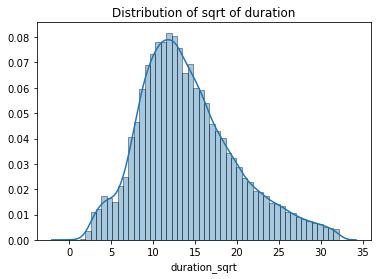

In [38]:
sqrt_transformer = FunctionTransformer(np.sqrt)
plt.title('Distribution of sqrt of duration')

df1['duration_sqrt'] = sqrt_transformer.fit_transform(df1[['duration']]) 
sns.distplot(df1['duration_sqrt'], hist_kws=dict(edgecolor="k", linewidth=1))

Square root transformation looks a lot more normal than log transfromation for duration.

In [39]:
df2 = df1.drop(columns=['duration', 'duration_log', 'marital_single' ]) # need a default for marital so I dropped single.
df2.head()

,housing,loan,Target,education_secondary,education_tertiary,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_services,job_student,job_technician,marital_divorced,marital_married,duration_sqrt
0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,16.155494
1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,12.288206
2,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,8.717798
5,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,11.789826
6,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,14.730920


In [40]:
#Split the data into training and test set in the ratio of 70:30 respectively. The target variable is Target.
X = df2.drop('Target',axis=1)
Y = df2['Target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1729)

############# Check to see if ratio of target is the same for orginal as in Training and test #############


print("".ljust(38, " "),"Count","Percent")
print("\n")
print("Original Personal_Loan True Values    :",len(df2.loc[df2['Target'] == 1]),"  ",(round(len(df2.loc[df2['Target'] == 1])/len(df2)*100,1)))
print("Training Personal_Loan False Values   :",len(df2.loc[df2['Target'] == 0])," ",(round(len(df2.loc[df2['Target'] == 0])/len(df2)*100,1)))
print("\n")
print("Training Personal_Loan True Values    :",len(y_train[y_train[:] == 1]),"  ",(round(len(y_train[y_train[:] == 1])/len(y_train)*100,1)))
print("Training Personal_Loan False Values   :",len(y_train[y_train[:] == 0])," ",(round(len(y_train[y_train[:] ==0])/len(y_train)*100,1)))
print("\n")
print("Test Personal_Loan True Values         :",len(y_test[y_test[:] == 1]),"  ",(round(len(y_test[y_test[:] == 1])/len(y_test)*100,1)))
print("Test Personal_Loan False Values        :",len(y_test[y_test[:] == 0])," ",(round(len(y_test[y_test[:] ==0])/len(y_test)*100,1)))

                                       Count Percent


Original Personal_Loan True Values    : 4467    10.6
Training Personal_Loan False Values   : 37806   89.4


Training Personal_Loan True Values    : 3093    10.5
Training Personal_Loan False Values   : 26498   89.5


Test Personal_Loan True Values         : 1374    10.8
Test Personal_Loan False Values        : 11308   89.2


Deliverable – 3 (create the ensemble model) 

In [41]:
################## Build log model #############
logit = sm.Logit( y_train, sm.add_constant( x_train ) )

lg = logit.fit()

print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.254877
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                29591
Model:                          Logit   Df Residuals:                    29575
Method:                           MLE   Df Model:                           15
Date:                Wed, 30 Sep 2020   Pseudo R-squ.:                  0.2390
Time:                        09:51:05   Log-Likelihood:                -7542.1
converged:                       True   LL-Null:                       -9910.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.8793      0.148    -33.052      0.000      -5.169      -4.590
ho

In [42]:
x_train = x_train.drop(columns=['job_management'],axis=1)
logit = sm.Logit( y_train, sm.add_constant( x_train ) )

lg = logit.fit()

print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.254881
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                29591
Model:                          Logit   Df Residuals:                    29576
Method:                           MLE   Df Model:                           14
Date:                Wed, 30 Sep 2020   Pseudo R-squ.:                  0.2390
Time:                        09:51:05   Log-Likelihood:                -7542.2
converged:                       True   LL-Null:                       -9910.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.9276      0.112    -44.181      0.000      -5.146      -4.709
ho

In [43]:
x_train = x_train.drop(columns=['job_technician'],axis=1)
logit = sm.Logit( y_train, sm.add_constant( x_train ) )

lg = logit.fit()

print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.254920
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                29591
Model:                          Logit   Df Residuals:                    29577
Method:                           MLE   Df Model:                           13
Date:                Wed, 30 Sep 2020   Pseudo R-squ.:                  0.2388
Time:                        09:51:06   Log-Likelihood:                -7543.3
converged:                       True   LL-Null:                       -9910.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.9610      0.109    -45.313      0.000      -5.176      -4.746
ho

In [44]:
x_train = x_train.drop(columns=['job_housemaid'],axis=1)
logit = sm.Logit( y_train, sm.add_constant( x_train ) )

lg = logit.fit()

print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.254961
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                29591
Model:                          Logit   Df Residuals:                    29578
Method:                           MLE   Df Model:                           12
Date:                Wed, 30 Sep 2020   Pseudo R-squ.:                  0.2387
Time:                        09:51:06   Log-Likelihood:                -7544.5
converged:                       True   LL-Null:                       -9910.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.9938      0.107    -46.481      0.000      -5.204      -4.783
ho

In [45]:
x_test = x_test.drop(columns=['job_housemaid', 'job_technician', 'job_management'],axis=1)
logreg = LogisticRegression(random_state= seed)
logreg.fit(x_train, y_train)
y_predict = logreg.predict(x_test)

Training accuracy:      89.8


Testing accuracy:      89.3


Recall:                16.4


Precision:             51.7


F1 Score:              25.0


Roc Auc Score:         57.3

Confusion Matrix for Logistic model



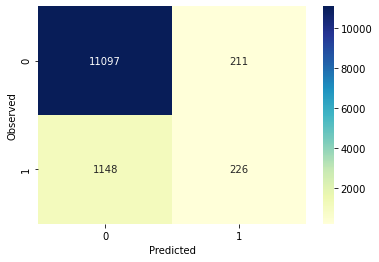

None


In [46]:
########################## Model Performance ########################

################### Make performance function ################
def perform_p(a,b,c,d,e,f):
    print("Training accuracy:     ",round(f.score(a,b)*100,1))  
    print("\n")
    print("Testing accuracy:     ", round(f.score(c, d)*100,1))
    print("\n")
    print("Recall:               ", round(recall_score(d,e)*100,1))
    print("\n")
    print("Precision:            ",round(precision_score(d,e)*100,1))
    print("\n")
    print("F1 Score:             ",round(f1_score(d,e)*100,1))
    print("\n")
    print("Roc Auc Score:        ",round(roc_auc_score(d,e)*100,1))
    return

######## function that makes metric data set ##########
def perform(a,b,c,d,e,f,g):
    dat = {"Method": f,
           "Training accuracy" : [round(g.score(a,b)*100,1)],
              "Testing accuracy": [round(g.score(c, d)*100,1)],
              "Recall": [round(recall_score(d,e)*100,1)],
              "Precision": [round(precision_score(d,e)*100,1)],
              "F1 Score": [round(f1_score(d,e)*100,1)],
              "Roc Auc Score": [round(roc_auc_score(d,e)*100,1)]}
    metric = pd.DataFrame(data=dat)
    return metric

perform_p(x_train,y_train,x_test,y_test,y_predict,logreg)
model1 = perform(x_train,y_train,x_test,y_test,y_predict,"Logistic",logreg) #save metrics as a data frame
print()

################ Make Confusion Matrix ##################
def confusion( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] , cmap="YlGnBu")
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

print('Confusion Matrix for Logistic model')
print()
print(confusion(y_test,y_predict))

In [47]:
############### Build Descison Tree #########################
model_tree=DecisionTreeClassifier(criterion='entropy')
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
print('Training Accuracy:   ', model_tree.score(x_train, y_train))
print('Test Accuracy:   ', model_tree.score(x_test, y_test))


Training Accuracy:    0.9616099489709709
Test Accuracy:    0.863586185144299


There is possible overfitting here. I will reduce max_depth and set min leaf size.

In [49]:
model_t_p = DecisionTreeClassifier(criterion = "entropy", random_state = seed,
                               max_depth=3, min_samples_leaf=5)
model_t_p.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1729, splitter='best')

In [50]:
print('Training Accuracy:   ', model_t_p.score(x_train, y_train))
print('Test Accuracy:   ', model_t_p.score(x_test, y_test))

Training Accuracy:    0.8983812645736879
Test Accuracy:    0.8927613941018767


Training and Test accuracy are much closer now.

Training accuracy:      89.8


Testing accuracy:      89.3


Recall:                6.9


Precision:             54.0


F1 Score:              12.3


Roc Auc Score:         53.1

Confusion Matrix for Descition tree  Method



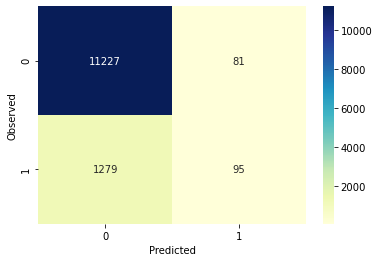

None


In [51]:
y_tree_predict = model_t_p.predict(x_test)
perform_p(x_train,y_train,x_test,y_test,y_tree_predict,model_t_p)
model2 = perform(x_train,y_train,x_test,y_test,y_tree_predict,"Decision Tree",model_t_p)
print()
print('Confusion Matrix for Descition tree  Method')
print()
print(confusion(y_test,y_tree_predict))

In [52]:
############### Random Forest #########################
Forest = RandomForestClassifier(random_state= seed, n_estimators=50)
Forest = Forest.fit(x_train, y_train)

pred_Forest = Forest.predict(x_test)
print(Forest.score(x_train,y_train))
print(Forest.score(x_test,y_test))

0.9609002737318779
0.8626399621510803


Training accuracy:      96.1


Testing accuracy:      86.3


Recall:                23.9


Precision:             32.1


F1 Score:              27.4


Roc Auc Score:         58.9

Confusion Matrix for Random Forest  Method



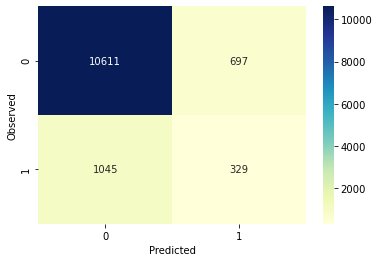

None


In [53]:
perform_p(x_train,y_train,x_test,y_test,pred_Forest,Forest)
model3 = perform(x_train,y_train,x_test,y_test,pred_Forest,"Random Forest",Forest)
print()
print('Confusion Matrix for Random Forest  Method')
print()
print(confusion(y_test,pred_Forest))

In [54]:
############### Bagging #########################
bag = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state= seed)
bag = bag.fit(x_train, y_train)
pred_BG = bag.predict(x_test)
print(bag.score(x_train,y_train))
print(bag.score(x_test,y_test))


0.9547159609340677
0.8750985648951269


In [55]:
bag = BaggingClassifier(n_estimators=100, max_samples= .1, bootstrap=True, oob_score=True, random_state= seed)
bag = bag.fit(x_train, y_train)
pred_BG = bag.predict(x_test)
print(bag.score(x_train,y_train))
print(bag.score(x_test,y_test))

0.9092967456321178
0.8902381327866267


In [56]:
bag = BaggingClassifier(n_estimators=1000, max_samples= .1, bootstrap=True, oob_score=True, random_state= seed)
bag = bag.fit(x_train, y_train)
pred_BG = bag.predict(x_test)
print(bag.score(x_train,y_train))
print(bag.score(x_test,y_test))

0.910885066405326
0.891263207695947


Training accuracy:      91.1


Testing accuracy:      89.1


Recall:                14.7


Precision:             49.4


F1 Score:              22.7


Roc Auc Score:         56.4

Confusion Matrix for Bagging  Method



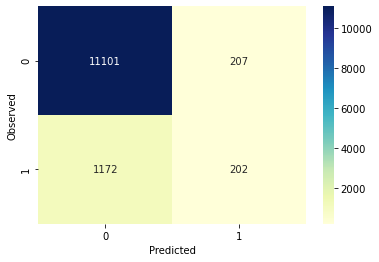

None


In [57]:
perform_p(x_train,y_train,x_test,y_test,pred_BG,bag)
model4 = perform(x_train,y_train,x_test,y_test,pred_BG,"Bagging",bag)
print()
print('Confusion Matrix for Bagging  Method')
print()
print(confusion(y_test,pred_BG))


In [58]:
############### Boosting #########################
boost = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state= seed)
boost = boost.fit(x_train, y_train)
print(boost.score(x_train,y_train))
print(boost.score(x_test,y_test))

0.897671589334595
0.8936287651789938


In [59]:
boost = AdaBoostClassifier(n_estimators = 1000, learning_rate=0.1, random_state= seed)
boost = boost.fit(x_train, y_train)
print(boost.score(x_train,y_train))
print(boost.score(x_test,y_test))
pred_AB =boost.predict(x_test)

0.8981785002196614
0.8920517268569627


Training accuracy:      89.8


Testing accuracy:      89.2


Recall:                14.8


Precision:             50.6


F1 Score:              22.9


Roc Auc Score:         56.5

Confusion Matrix for Boosting  Method



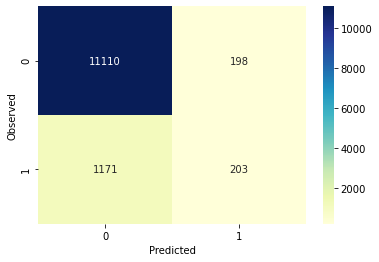

None


In [60]:
perform_p(x_train,y_train,x_test,y_test,pred_AB,boost)
model5 = perform(x_train,y_train,x_test,y_test,pred_AB,"Boosting",boost)
print()
print('Confusion Matrix for Boosting  Method')
print()
print(confusion(y_test,pred_AB))

In [61]:
############### Gradient Boosting #########################
Gradient = GradientBoostingClassifier(random_state= seed, n_estimators=200,)
Gradient = Gradient.fit(x_train, y_train)

pred_Gradient = Gradient.predict(x_test)
print(Gradient.score(x_train,y_train))
print(Gradient.score(x_test,y_test))

0.9049711060795512
0.8911055038637439


Training accuracy:      90.5


Testing accuracy:      89.1


Recall:                13.9


Precision:             49.1


F1 Score:              21.7


Roc Auc Score:         56.1

Confusion Matrix for Gradient Boosting  Method



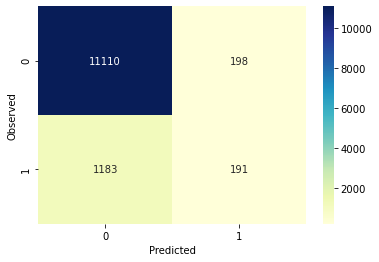

None


In [62]:
perform_p(x_train,y_train,x_test,y_test,pred_Gradient,Gradient)
model6 = perform(x_train,y_train,x_test,y_test,pred_Gradient,"Gradient Boosting",Gradient)
print()
print('Confusion Matrix for Gradient Boosting  Method')
print()
print(confusion(y_test,pred_Gradient))

In [63]:
##############################################################
###  Make a DataFrame to compare models and their metrics  ###
##############################################################

fram = [model1, model2, model3, model4, model5, model6]

frams = pd.concat(fram)

frams


,Method,Training accuracy,Testing accuracy,Recall,Precision,F1 Score,Roc Auc Score
0,Logistic,89.8,89.3,16.4,51.7,25.0,57.3
0,Decision Tree,89.8,89.3,6.9,54.0,12.3,53.1
0,Random Forest,96.1,86.3,23.9,32.1,27.4,58.9
0,Bagging,91.1,89.1,14.7,49.4,22.7,56.4
0,Boosting,89.8,89.2,14.8,50.6,22.9,56.5
0,Gradient Boosting,90.5,89.1,13.9,49.1,21.7,56.1


Conclustion



In the bank's case, finding a model that is best at predicting true positives, clients predicted to have subscribed for a term deposit and the client actually did subscribe, should be the best model because it could be the most lucrative for the bank. Since Random Forest did the best at recall and decision tree did the best at precision, I want to look at F1 score. The F1 score is like the average of the two scores. Decision Tree method did the worst at the recall, F1 Score and Roc Auc Score. The Rand Forest method resulted in the highest Roc Auc Score, F1 score, and Recall. Looking across the different metrics I find Random Forest method to be the best.